# Get JP Probability

# Import Package

In [1]:
# import package
# basic
import itertools
import random
import time
from collections import defaultdict, Counter
from functools import wraps
import os

# data
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

# utilities
import math

# import functions
from judge_hands_func import *
from set_poker_func import *
from compete_hands import *
from preflop_func import *



# Define Getting Time Function

In [2]:
# def decorater -- get running time
def get_running_time(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        duration = round(end - start, 2)
        return result, duration
    return wrapper

# Generate Playing Cards

In [3]:
# check func is usable
deck = generate_deck()
len(deck)

52

# Evaluate Hand & Find Best Hand to compete
比較牌型大小


## Testing the Function of Evaluating Hand

In [ ]:
# testing
hand_1 = [
    ('spade', '9'), ('spade', 'T'), ('spade', 'Q'),
    ('heart', 'J'), ('club', '8'), ('diamond', '7'), ('club', '6')
]

hand_2 = [ 
    ('heart', '9'), ('spade', '9'), ('club', '9'),
    ('diamond', '7'), ('spade', '7'), ('club', '6'), ('heart', '5')
]

hand_3 = [ 
    ('heart', 'Q'), ('spade', 'Q'), ('diamond', 'Q'),
    ('club', 'J'), ('heart', 'J'), ('spade', '2'), ('diamond', '3')
]

hand_4 = [ 
    ('heart', '2'), ('heart', '4'), ('heart', '6'),
    ('heart', '9'), ('spade', '3'), ('diamond', '5'), ('heart', 'K')
]

hand_5 = [ 
    ('spade', 'A'), ('club', '2'), ('diamond', '3'),
    ('heart', '4'), ('spade', '5'), ('heart', '9'), ('diamond', 'T')
]

hand_6 = [ 
    ('heart', '8'), ('spade', '8'), ('club', '3'),
    ('diamond', '3'), ('spade', 'T'), ('heart', 'J'), ('club', 'A')
]

hand_7 = [ 
    ('heart', 'K'), ('spade', 'K'), ('club', '2'),
    ('diamond', '6'), ('spade', '9'), ('heart', '7'), ('diamond', '3')
]

hand_8 = [ 
    ('spade', 'A'), ('club', 'K'), ('diamond', 'Q'),
    ('heart', 'J'), ('spade', 'T'), ('club', '6'), ('diamond', '3')
]

hand_9 = [ 
    ('spade', '4'), ('club', '6'), ('diamond', '8'),
    ('heart', 'T'), ('spade', 'J'), ('club', 'Q'), ('diamond', '2')
]

# get results
result1 = evaluate_hand(hand_1, return_best_cards=True)
print(result1)
result2 = evaluate_hand(hand_2, return_best_cards=True)
print(result2)
result3 = evaluate_hand(hand_3, return_best_cards=True)
print(result3)
result4 = evaluate_hand(hand_4, return_best_cards=True)
print(result4)
result5 = evaluate_hand(hand_5, return_best_cards=True)
print(result5)
result6 = evaluate_hand(hand_6, return_best_cards=True)
print(result6)
result7 = evaluate_hand(hand_7, return_best_cards=True)
print(result7)
result8 = evaluate_hand(hand_8, return_best_cards=True)
print(result8)
result9 = evaluate_hand(hand_9, return_best_cards=True)
print(result9)


# simulate single simple game

In [ ]:
# simulate single simple game
simulate_simple_game(my_hand=[('spade', 'Q'), ('heart', 'Q')],opponent_hand = [('heart', 'K'), ('heart', '7')])

my hand : [('spade', 'Q'), ('heart', 'Q')]
enemy hand : [('heart', 'K'), ('heart', '7')]

 Flop : [('heart', '4'), ('diamond', '4'), ('spade', '4')]
Current Leader : me

 Turn : ('diamond', '6')
Current Leader : me

 River : ('heart', '6')
Current Leader : me

 final result
winner : me
hand type : Full House
composition : [('heart', 4), ('diamond', 4), ('spade', 4), ('spade', 12), ('heart', 12)]


('me',
 {'hand_type': 'Full House',
  'top_value': 4,
  'best_hand': [('heart', 4),
   ('diamond', 4),
   ('spade', 4),
   ('spade', 12),
   ('heart', 12)]})

# List Functions

* `@get_running_time` : <br>
    - put in front of function, return `running time` <br>

* `generate_deck(shuffled=True)` : <br>
    - return `deck` <br>

* `evaluate_hand(seven_cards, return_best_cards=False)` : <br>
    - return `hand, highest point, (5 best card)` <br>

* `compare_hands(my_hand, opponent_hand, community_cards)` : <br>
    - return who win with type and value <br>

* `get_hand_score` : <br>
    - return hand score to know who win <br>

* `simulate_game(my_hand=None, opponent_hand=None)` : <br>
    - return who win and know the win type <br>



# Preflop
建立一張表來查看各個手牌的勝率


## find win rate

In [3]:
# testing--hands with 2 enemy
print(simulate_preflop(
    my_hand=[('spade', 'A'), ('heart', 'T')],
    opponent_num=2,
    opponent_hands_or_vpip=[[('heart', 'K'), ('heart', 'A')],[('spade', '9'), ('heart', '9')]],
    epoch=1000))
print("-"*50)
# testing--vpip with 2 enemy
print(simulate_preflop(
    my_hand=[('spade', 'A'), ('heart', 'T')], 
    opponent_num=2,
    opponent_hands_or_vpip=(10,50), 
    epoch=1000))
print("-"*50)
# testing
print(simulate_preflop(my_hand = [('spade', 'A'), ('heart', 'K')],
                       opponent_num=5, epoch=40000))
print("-"*50)
print(simulate_preflop(my_hand = [('spade', 'J'), ('heart', 'J')],
                       opponent_num=1, epoch=50000))
print("-"*50)
print(simulate_preflop(my_hand = [('spade', '9'), ('heart', '9')],
                       opponent_num=1, epoch=50000))

([('spade', 'A'), ('heart', 'T')], 0.198, 0.028, [[('heart', 'K'), ('heart', 'A')], [('spade', '9'), ('heart', '9')]], 2)
--------------------------------------------------
([('spade', 'A'), ('heart', 'T')], 0.259, 0.04, (10, 50), 2)
--------------------------------------------------
([('spade', 'A'), ('heart', 'K')], 0.269, 0.0243, 'random', 5)
--------------------------------------------------
([('spade', 'J'), ('heart', 'J')], 0.7604, 0.0064, 'random', 1)
--------------------------------------------------
([('spade', '9'), ('heart', '9')], 0.7001, 0.0086, 'random', 1)


## generate unique hands

In [6]:
# try
a = get_hand_label(('spade', 'A'), ('heart', 'T'))
b = get_hand_label(('spade', 'A'), ('spade', 'K'))
c = get_hand_label(('spade', 'J'), ('heart', 'J'))

print(a, b, c)

ATo AKs JJ


## build preflop winrate

In [ ]:
# epochs = 50000

# preflop_winrate_df_1 = build_preflop_winrate_df(opponent_num=1, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_1.csv", simulate=True)
# # run time : 2m 55s / epoch 50000

# preflop_winrate_df_2 = build_preflop_winrate_df(opponent_num=2, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_2.csv", simulate=True)
# # run time : 3m 52s / epoch 50000

# preflop_winrate_df_3 = build_preflop_winrate_df(opponent_num=3, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_3.csv", simulate=True)
# # run time : 4m 50s / epoch 50000

# preflop_winrate_df_4 = build_preflop_winrate_df(opponent_num=4, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_4.csv", simulate=True)
# # run time : 5m 39s / epoch 50000

# preflop_winrate_df_5 = build_preflop_winrate_df(opponent_num=5, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_5.csv", simulate=True)
# # run time : 6m 22s / epoch 50000

# preflop_winrate_df_6 = build_preflop_winrate_df(opponent_num=6, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_6.csv", simulate=True)
# # run time : 7m 9s / epoch 50000

# preflop_winrate_df_7 = build_preflop_winrate_df(opponent_num=7, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_7.csv", simulate=True)
# # run time : 8m 17s / epoch 50000

# preflop_winrate_df_8 = build_preflop_winrate_df(opponent_num=8, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_8.csv", simulate=True)
# # run time : 8m 51s / epoch 50000

# preflop_winrate_df_9 = build_preflop_winrate_df(opponent_num=9, epoch=epochs, save_path=r"preflop_sim_result/preflop_enemy_9.csv", simulate=True)
# # run time : 9m 45s / epoch 50000

In [2]:
# build df
preflop_winrate_df_1 = build_preflop_winrate_df(opponent_num=1,
                                                 save_path=r"preflop_sim_result/preflop_enemy_1.csv", simulate=False)
preflop_winrate_df_5 = build_preflop_winrate_df(opponent_num=5,
                                                 save_path=r"preflop_sim_result/preflop_enemy_5.csv", simulate=False)
preflop_winrate_df_6 = build_preflop_winrate_df(opponent_num=6,
                                                 save_path=r"preflop_sim_result/preflop_enemy_6.csv", simulate=False)
preflop_winrate_df_8 = build_preflop_winrate_df(opponent_num=8,
                                                 save_path=r"preflop_sim_result/preflop_enemy_8.csv", simulate=False)
preflop_winrate_df_9 = build_preflop_winrate_df(opponent_num=9,
                                                 save_path=r"preflop_sim_result/preflop_enemy_9.csv", simulate=False)

In [3]:
# build df
for i in range(1, 10):
    globals()[f"preflop_winrate_df_{i}"] = build_preflop_winrate_df(
        opponent_num=i,
        save_path=f"preflop_sim_result/preflop_enemy_{i}.csv",
        simulate=False
    )


## heat map

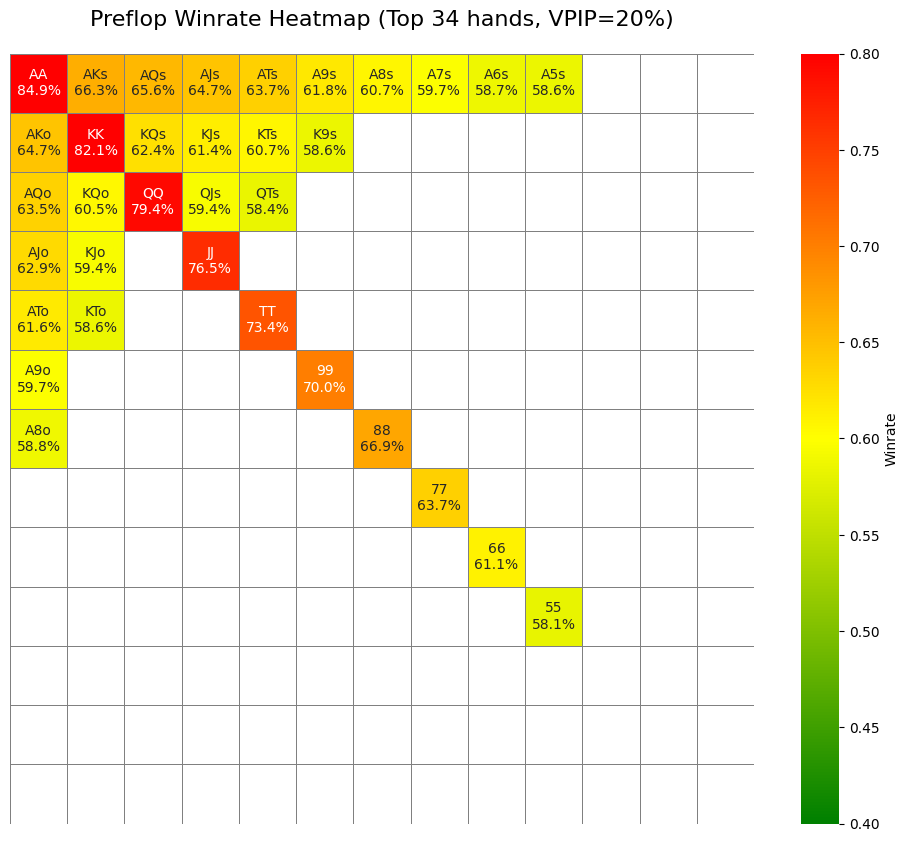

In [46]:
# try 100% vpip
plot_preflop_heatmap_vpip(preflop_winrate_df_1, 20,value_col="win_rate",
                          vmin=0.4, vmax=0.8, vcenter=0.6)


## theroical VPIP in all place
total : <br>
* 9 people --> 14~16% <br>
* 6 people --> 20~25% <br>

------

| palce     | 6 people   |  9 people   |
|-----------|------------|-------------|
| UTG/EP    | 12-15%     | 5-8%        |
| MP        | 15-18%     | 15-18%      |
| CO        | 20-25%     | 20-25%      |
| BTN       | 35-50%     | 40-50%      |
| SB        | 30-40%     | 30-40%      |
| BB        | 25-35%     | 25-35%      |




### set vpip in position

In [5]:
# median vpip in all place
vpip_median_6 = {
    "UTG": 14,   # 12~15%
    "MP": 16,    # 15~18%
    "CO": 23,    # 20~25%
    "BTN": 43,   # 35~50%
    "SB": 35,    # 30~40%
    "BB": 30    # 25~35%
}
# median vpip in all place
vpip_median_9 = {
    "UTG": 7,   # 5~8%
    "MP": 16,    # 15~18%
    "CO": 23,    # 20~25%
    "BTN": 45,   # 40~50%
    "SB": 35,    # 30~40%
    "BB": 30    # 25~35%
}


### 6 people

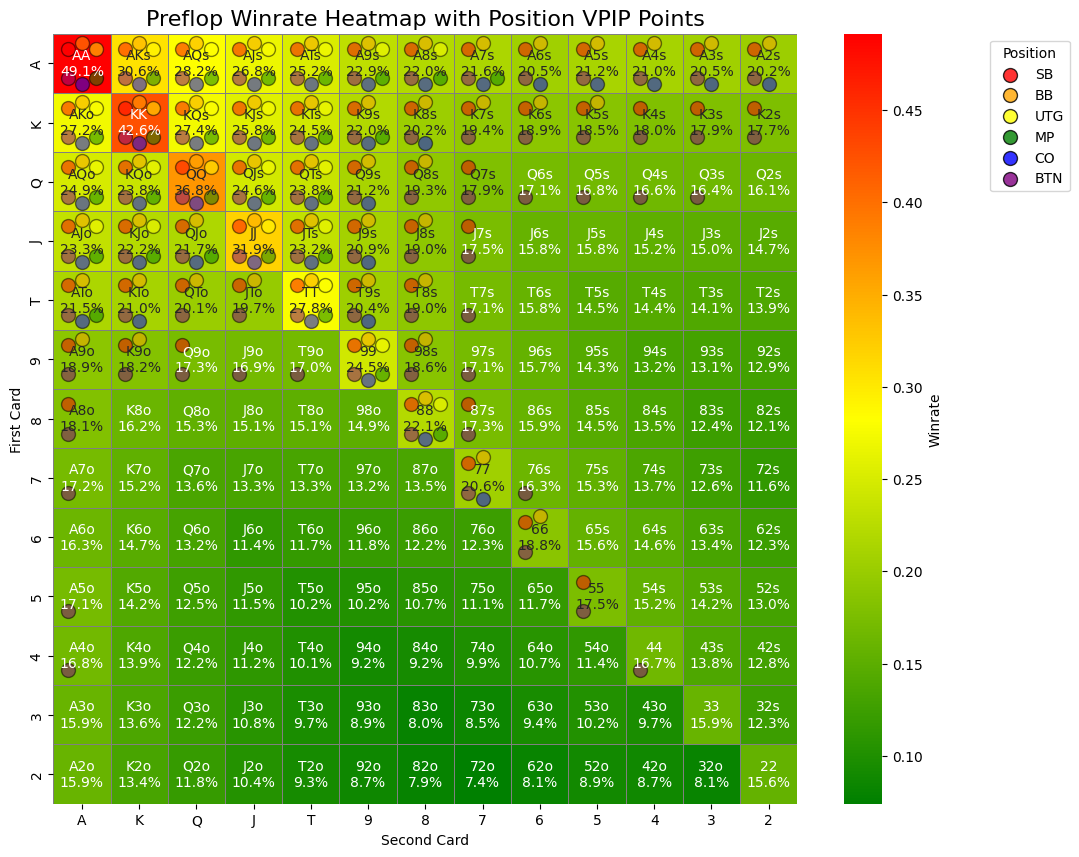

In [ ]:
# show win rate when 6 people on table
plot_preflop_heatmap_vpip(preflop_winrate_df_5, vpip_dict=vpip_median_6)

### 9 people

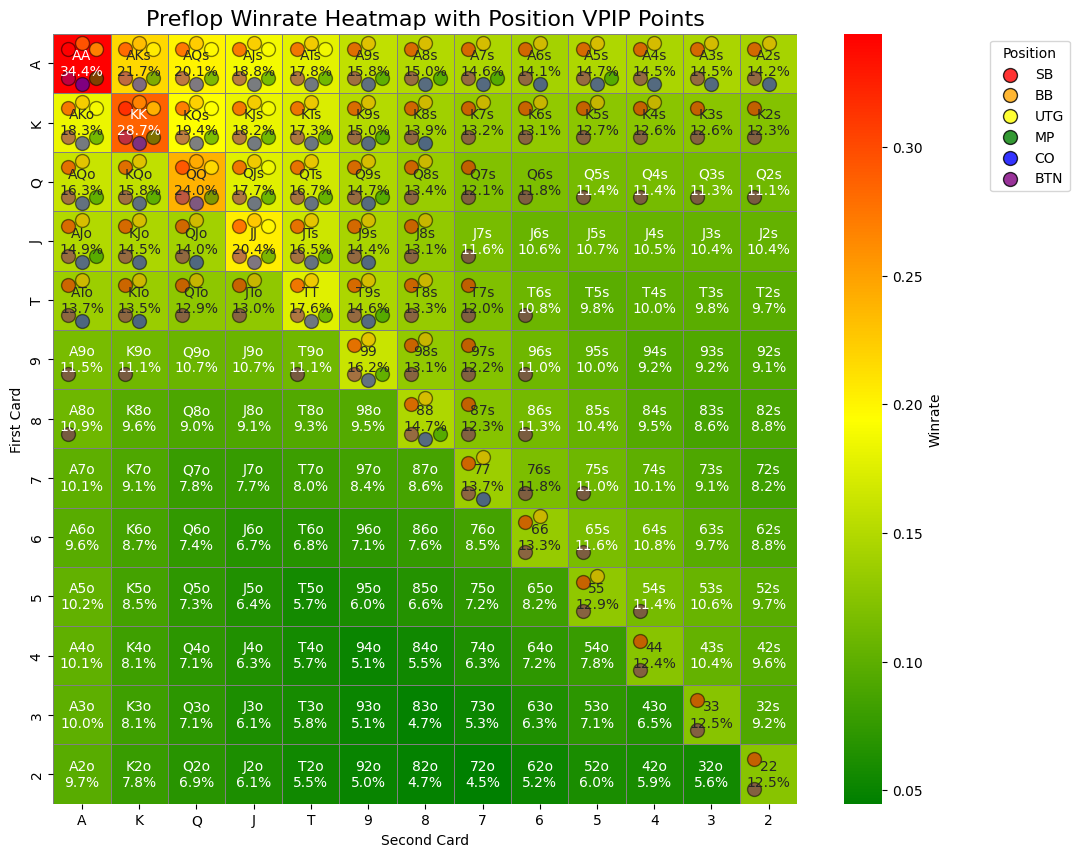

In [ ]:
# show win rate when 9 people on table
plot_preflop_heatmap_vpip(preflop_winrate_df_8, vpip_dict=vpip_median_9)


上述這些是理論上我應該要拿來開牌的範圍 <br>
接著我希望可以知道我面對不同入池率以及不同人數的情況下 <br>
我最好拿出哪些牌進入遊戲 <br>

也還沒做出應該要選擇投入多少進到底池當中會比較好(考慮後手以及底池的情況下) <br>


## conflict with different vpip

In [ ]:
# show different winrate when different people
display(vpip_range(preflop_winrate_df_5, 5))
print("-"*50)
display(vpip_range(preflop_winrate_df_1, 5))

,hand,win_rate,tie_rate,total_epoch,opponent_num
0,AA,0.4913,0.0076,100000,5
1,KK,0.4260,0.0078,100000,5
2,QQ,0.3675,0.0089,100000,5
3,JJ,0.3193,0.0096,100000,5
4,AKs,0.3059,0.0232,100000,5
5,AQs,0.2820,0.0281,100000,5
6,TT,0.2784,0.0108,100000,5
7,KQs,0.2742,0.0248,100000,5
8,AKo,0.2718,0.0242,100000,5


--------------------------------------------------


,hand,win_rate,tie_rate,total_epoch,opponent_num
0,AA,0.8490,0.0060,100000,1
1,KK,0.8210,0.0057,100000,1
2,QQ,0.7937,0.0061,100000,1
3,JJ,0.7650,0.0067,100000,1
4,TT,0.7340,0.0077,100000,1
5,99,0.7001,0.0080,100000,1
6,88,0.6689,0.0089,100000,1
7,AKs,0.6628,0.0171,100000,1
8,AQs,0.6562,0.0186,100000,1


# Flop
1. 大概知道目前的勝率是多少 <br>
2. 建立一個函式來判斷目前有可能對上的手牌範圍 <br>


In [ ]:
# set hands
my_hand=[('club', 'A'), ('heart', 'K')]
opp_hand = [[('heart', '2'), ('club', '4')],[('club', 'Q'), ('spade', 'J')]]
opp_vpip = (15,30)

In [48]:
print(simulate_detail_game(my_hand=my_hand,community_card=[('diamond', '3'), ('spade', '4'), ('heart', '8')], opponent_hands_or_vpip=opp_vpip, epoch = 40000, street="flop"))

([('club', 'A'), ('heart', 'K')], [('diamond', '3'), ('spade', '4'), ('heart', '8')], 0.5117, 0.0701, (15, 30))


# Trun

In [49]:
print(simulate_detail_game(my_hand=my_hand,community_card=[('diamond', '3'), ('spade', '4'), ('heart', '8'), ('club', 'T')], opponent_hands_or_vpip=opp_vpip, epoch = 40000, street="turn"))

([('club', 'A'), ('heart', 'K')], [('diamond', '3'), ('spade', '4'), ('heart', '8'), ('club', 'T')], 0.425, 0.053, (15, 30))


# River

In [50]:
print(simulate_detail_game(my_hand=my_hand,community_card=[('diamond', '3'), ('spade', '4'), ('heart', '8'), ('club', 'T'), ('diamond', 'A')], opponent_hands_or_vpip=opp_vpip, epoch = 40000, street="river"))

([('club', 'A'), ('heart', 'K')], [('diamond', '3'), ('spade', '4'), ('heart', '8'), ('club', 'T'), ('diamond', 'A')], 0.7115, 0.0537, (15, 30))


# DL

導入 PPO 的方法 <br>
來選擇應該如何下注 <br>